### Tutorial

#### Import necessary packages

In [1]:
from clusc import *

#### Preprocess raw data to get clusC formatted input data

In [ ]:
loci_infile = "examples/tf/K562.CTCF.chr11.bed"
loci_outfile = "examples/results/loci.txt"
loci_pd = preprocess_loci(loci_infile, loci_outfile)

hic_infile = "examples/hic/K562.chr11.1kb.cool"
hic_outfile = "examples/results/hic_net.txt"
hic_net = preprocess_hic(hic_infile, hic_outfile, loci_pd)

feat_infile = "examples/features/wgEncodeRegTfbsClusteredWithCellsV3_K562.bed"
feat_outfile = "examples/results/feat.tf.txt"
cat_file = "examples/features/Tf_K562"
feat_mat = preprocess_feat(feat_infile, feat_outfile, loci_pd, feat_type="cat", cat_file=cat_file)

#### Get input data and make it formatted for ARGA algorithm

In [11]:
loci_file = "examples/results/loci.txt"
loci_pd = load_data("loci", loci_file)

hic_file = "examples/results/hic_net.txt"
hic_net = load_data("net", hic_file, loci_num=len(loci_pd))

feat_file = "examples/results/feat.tf.txt"
feat_mat = load_data("feat", feat_file)

In [ ]:
hic_net = noramlization_hic(hic_net, threshold=0)

In [ ]:
arga_data = format_data(loci_pd, hic_net, feat_mat, algorithm="arga")

#### Graph embedding

In [ ]:
result_emb = embedding(arga_data, n_clusters=4, algorithm="arga", model="arga_vae", epochs=100)

#### Make clusters

In [ ]:
result_pd = clustering(result_emb, n_clusters=4, ids=list(arga_data["id_labels"].values()))

In [ ]:
clusters_to_bed(result_pd, 'examples/results/clusters.bed')
clusters_to_links(result_pd, hic_net, 'examples/results/clusters.links')

#### Plotting

In [4]:
region = 'chr11',107356000,109840000

track_hic  = dict(
    file='/home/archer/Desktop/ClusC/examples/datasets/Rao2014-K562-MboI-allreps-filtered.1kb.chr11.cool',
    overlay_previous='no',
    depth=100000,
    #min_value =1,
    #max_value = 10,
    transform = 'log1p',
   # colormap='PuRd',
    section_name="test")

track_h3k4me1  = dict(
    file='/home/archer/Desktop/ClusC/examples/datasets/K562-H3K4me1.imputed.pval.signal.bigwig',
    overlay_previous='no',
    color='red')

track_clusters_links  = dict(
    file='/home/archer/Desktop/ClusC/examples/results/clusters.links',
    overlay_previous='no',
    section_name='clusters',
    orientation = 'inverted')

track_clusters_bed  = dict(
    file='/home/archer/Desktop/ClusC/examples/results/clusters.bed',
    overlay_previous='no',
    display = 'collapsed',
    labels=False,
    section_name='clusters',
    title="clusters")

track_configs = {}
track_configs[0] = track_hic
track_configs[1] = track_clusters_bed
track_configs[2] = track_clusters_links
track_configs[3] = track_h3k4me1



INFO:pygenometracks.tracks.GenomeTrack:setting min, max values for track test to: 1.0, 6.925533394710496

100%|██████████| 46/46 [00:00<00:00, 40414.32it/s]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 1.08,-0.08
DEBUG:pygenometracks.tracks.GenomeTrack:70 were links plotted


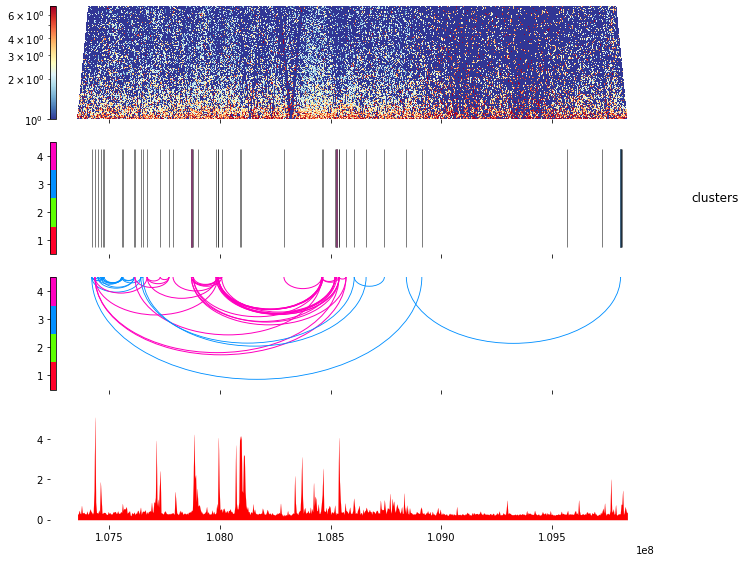

In [5]:
plot_tracks(region, track_configs, '/home/archer/Desktop/ClusC/examples/results/plotting_tracks.png')

In [6]:
circos_chrom = dict(
    file='/home/archer/Desktop/ClusC/examples/chrom_regions_2.txt',
    cytobands_file='/home/archer/Desktop/ClusC/examples/chromosome.band.hg19.txt',
    label=True,
    tick_unit=1000000,
    tick_label='M',
    tick_length=0.1,
    tick_orientation='inside',
    radius=0.85,
    width=0.4,
    color=['red','orange'],
    type='chrom')

circos_hic = dict(
    region_file='/home/archer/Desktop/ClusC/examples/chrom_regions_hic.txt',
    file='/home/archer/Desktop/ClusC/examples/datasets/Rao2014-K562-MboI-allreps-filtered.1kb.cool',
    depth=100000,
    res=1000,
    transform = 'log',
    radius=0.65,
    width=1.2,
    color='RdYlBu_r',
    type='hic')

circos_clusters_bed  = dict(
    file='/home/archer/Desktop/ClusC/examples/clusters.bed',
    radius=0.5,
    width=0.2,
    color=['red','orange','green','blue'],
    type='highlight')

#circos_clusters_signal  = dict(
    #file='/home/archer/Desktop/ClusC/examples/clusters_1.bed',
    #radius=0.58,
    #width=0.4,
    #color=['red','orange','green','blue'],
    #type='bar')

circos_clusters_signal = dict(
    region_file='/home/archer/Desktop/ClusC/examples/chrom_regions_2.txt',
    file='/home/archer/Desktop/ClusC/examples/datasets/K562-H3K4me1.imputed.pval.signal.bigwig',
    res=25,
    radius=0.58,
    width=0.4,
    color=['red','yellow'],
    type='bigwig')

circos_clusters_links  = dict(
    file='/home/archer/Desktop/ClusC/examples/results/clusters.links',
    radius=0.45,
    color='RdYlBu',
    type='link')

circos_configs = {}
circos_configs[0] = circos_chrom
circos_configs[1] = circos_clusters_bed
circos_configs[2] = circos_clusters_signal
circos_configs[3] = circos_clusters_links
circos_configs[4] = circos_hic

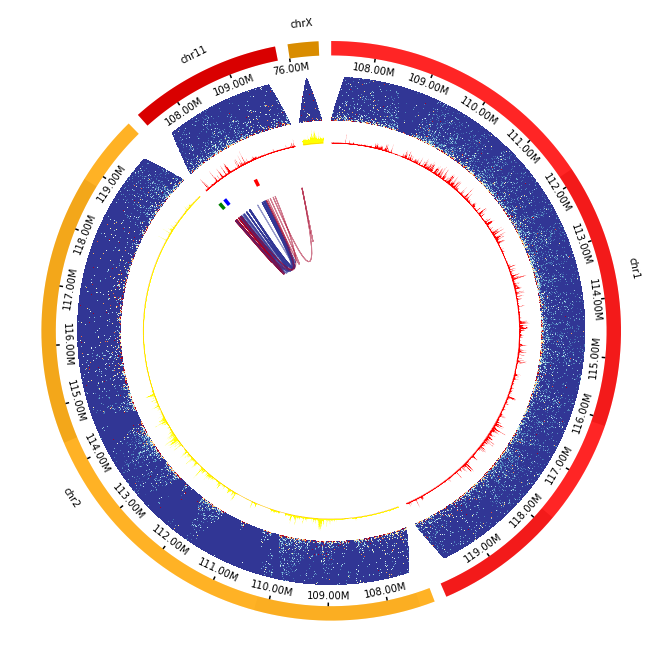

In [7]:
plot_circos(circos_configs, '/home/archer/Desktop/ClusC/examples/results/plotting_circos.png')

In [4]:
pos = [0,1,2,3]
t = np.array([[1,0.5],[-1,0.5]])
pos_tmp = np.dot(np.array([(i[1],i[0]) for i in itertools.product(pos[::-1],pos)]),t)
n = len(pos)
X = pos_tmp[:,1].reshape(n,n)
X

array([[1.5, 2. , 2.5, 3. ],
       [1. , 1.5, 2. , 2.5],
       [0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5]])

In [6]:
a

array([0, 1, 2, 2])

In [9]:
a = np.delete(a,-1)
a

array([0, 1])

#### Motif finding